# Natalie Johnson Final Project: Mushroom dataset
## Part 2: Brief
### Preform EDA on the dataset

#### Import necessary pacakges

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

random_state = 1892

#### Read in the data and set the columns.

In [2]:
file = './data/agaricus-lepiota.data'
df = pd.read_csv(file, header=None)
df.columns = ['class', 'cap_shape', 'cap_surface','cap_color',
                'bruises', 'odor', 'gill_attachment', 'gill_spacing', 
                'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 
                'stalk_surface_above_ring','stalk_surface_below_ring', 
                'stalk_color_above_ring', 'stalk_color_below_ring', 
                'veil_type', 'veil_color', 'ring_number','ring_type', 
                'spore_print_color', 'population', 'habitat']

In [3]:
df.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [5]:
# Look at the number of values in each feature column
for col in df:
    print('Column:', col, df[col].unique(), '\n\tTotal Unique:', len(df[col].unique()))

Column: class ['p' 'e'] 
	Total Unique: 2
Column: cap_shape ['x' 'b' 's' 'f' 'k' 'c'] 
	Total Unique: 6
Column: cap_surface ['s' 'y' 'f' 'g'] 
	Total Unique: 4
Column: cap_color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r'] 
	Total Unique: 10
Column: bruises ['t' 'f'] 
	Total Unique: 2
Column: odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm'] 
	Total Unique: 9
Column: gill_attachment ['f' 'a'] 
	Total Unique: 2
Column: gill_spacing ['c' 'w'] 
	Total Unique: 2
Column: gill_size ['n' 'b'] 
	Total Unique: 2
Column: gill_color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o'] 
	Total Unique: 12
Column: stalk_shape ['e' 't'] 
	Total Unique: 2
Column: stalk_root ['e' 'c' 'b' 'r' '?'] 
	Total Unique: 5
Column: stalk_surface_above_ring ['s' 'f' 'k' 'y'] 
	Total Unique: 4
Column: stalk_surface_below_ring ['s' 'f' 'y' 'k'] 
	Total Unique: 4
Column: stalk_color_above_ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y'] 
	Total Unique: 9
Column: stalk_color_below_ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c'] 
	Total Uniq

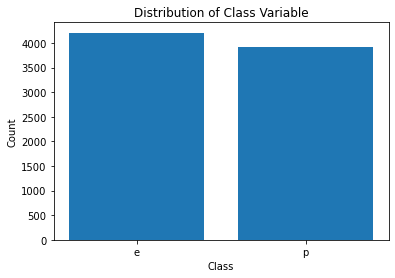

In [6]:
# Look at distribuution of target variable:
plt.bar(df['class'].value_counts().index, df['class'].value_counts());
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Class Variable');

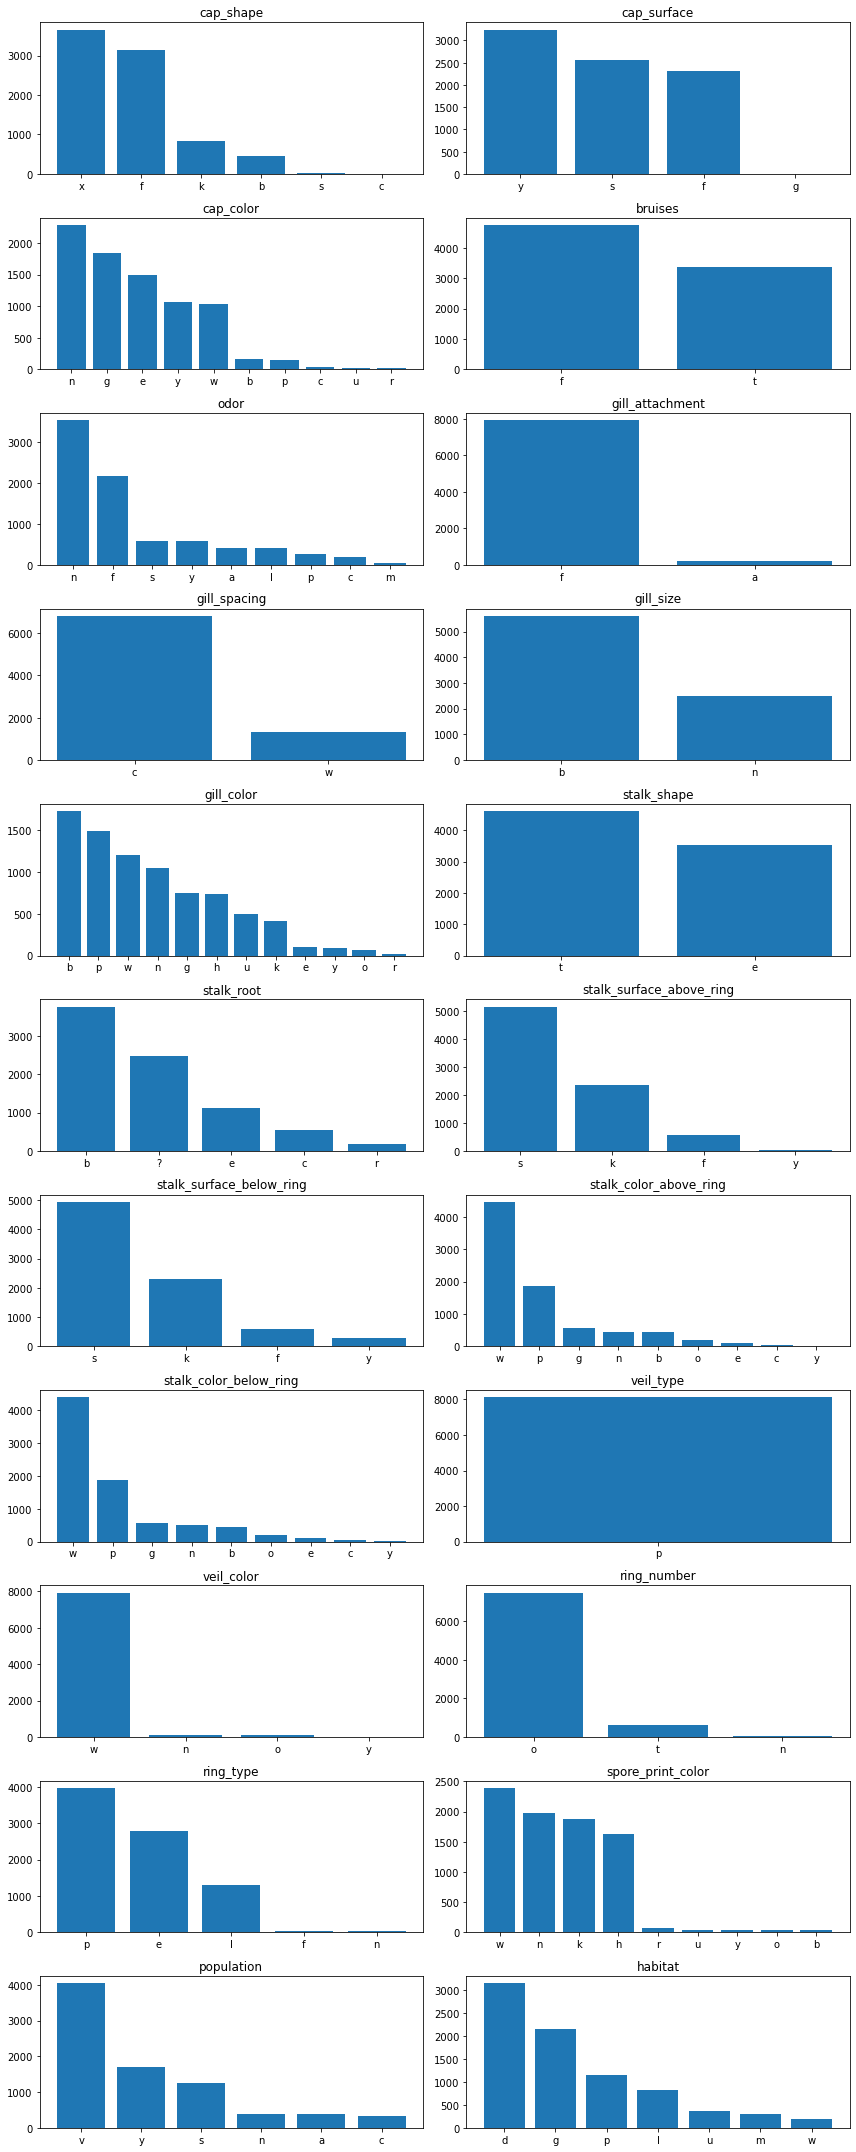

In [7]:
# Visual distribution of unique values per feature

fix, ax = plt.subplots(11,2, figsize=(12,30))
i,j = 0,0
for k, col in enumerate(df.columns[1:]):
    ax[i][j].bar(df[col].value_counts().index, df[col].value_counts())
    ax[i][j].set_title(col)   
    i = i+1 if k % 2 != 0 else i
    j = 1 if j == 0 else 0

plt.tight_layout()

In [8]:
# Remove 'veil_type' column because there is only one answer. It is unhelpful.
df.drop('veil_type', axis='columns', inplace=True)

Re-display distribution of features
```p
fix, ax = plt.subplots(7,3, figsize=(12,30))
i,j = 0,0
for col in df.columns[1:]:
    ax[i][j].bar(df[col].value_counts().index, df[col].value_counts())
    ax[i][j].set_title(col)   
    i = i+1 if j == 2 else i
    j = j+1 if j < 2 else 0

plt.tight_layout()
```

## Part 3: Technical Notebook
### Build and document a working model, prototype, recommendation, or solution.

### Encode dataframe

In [9]:
# Label Encode the target variable (class). 
df_class_encoded= pd.DataFrame({'class': LabelEncoder().fit_transform(df.iloc[:, 0])})

In [10]:
# Use Ordinal encoding on the features.
df_encoded = pd.DataFrame(OrdinalEncoder().fit_transform(df.iloc[:, 1:]))
df_encoded.columns = df.columns[1:]
df_encoded = pd.concat([df_class_encoded, df_encoded], axis=1)
df_encoded.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,...,2.0,2.0,7.0,7.0,2.0,1.0,4.0,2.0,3.0,5.0
1,0,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,...,2.0,2.0,7.0,7.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,...,2.0,2.0,7.0,7.0,2.0,1.0,4.0,3.0,2.0,3.0
3,1,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,...,2.0,2.0,7.0,7.0,2.0,1.0,4.0,2.0,3.0,5.0
4,0,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,...,2.0,2.0,7.0,7.0,2.0,1.0,0.0,3.0,0.0,1.0


In [11]:
# Dummy Encoding
df_dummies = pd.get_dummies(df.iloc[:,1:])

# Join 'class' label encoded column with the features from the dummies df.
df_onehot_encoded = pd.concat([df_class_encoded, df_dummies], axis=1)
df_onehot_encoded.head()

,class,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_f,cap_surface_g,cap_surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [12]:
# Determine the correlation between each feature and the class variable.
df_corr = df_onehot_encoded.corr()
df_corr_class = df_corr['class']

# Find the features with a correlation over 0.45.
top_corr = df_corr_class[abs(df_corr_class) >= 0.45]
# Remove correlation with itself.
top_corr.drop('class', axis=0, inplace=True) # top_corr = top_corr.iloc[1:] # Alternate way to remove first row.
top_corr

bruises_f                     0.501530
bruises_t                    -0.501530
odor_f                        0.623842
odor_n                       -0.785557
gill_size_b                  -0.540024
gill_size_n                   0.540024
gill_color_b                  0.538808
stalk_surface_above_ring_k    0.587658
stalk_surface_above_ring_s   -0.491314
stalk_surface_below_ring_k    0.573524
ring_type_l                   0.451619
ring_type_p                  -0.540469
spore_print_color_h           0.490229
Name: class, dtype: float64

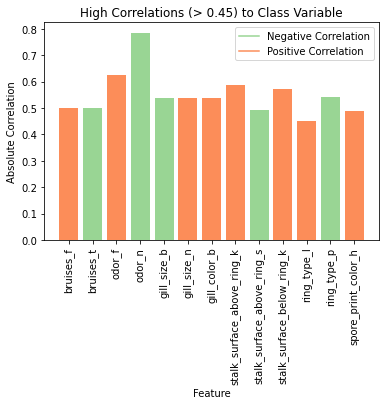

In [13]:
# Visualize the correlations between the features and the class variable.
bar_colors = ['#99d594' if c < 0 else '#fc8d59' for c in top_corr]
custom_legend = [plt.Line2D([0], [0], color='#99d594'), plt.Line2D([0], [0], color='#fc8d59')]

plt.bar(x=top_corr.index, height=abs(top_corr), color=bar_colors)
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.ylabel('Absolute Correlation')
plt.legend(custom_legend, ["Negative Correlation", "Positive Correlation"])
plt.title("High Correlations (> 0.45) to Class Variable");

## Now that the data has been encoded and explored, different models can be run.

### Use label/ordinal encoding and `Logistic Regression` on a training set to predict the class for the test set. 

In [14]:
# Define the features and class using 'X' and 'y'
X_ordinal = df_encoded.iloc[:, 1:]
y_ordinal = df_encoded['class']

# Split the data
X_ordinal_train, X_ordinal_test, y_ordinal_train, y_ordinal_test = train_test_split(X_ordinal, y_ordinal, random_state=random_state, test_size=.3)

# Instantiate, fit and predict the model
logreg_ordinal = LogisticRegression()
logreg_ordinal.fit(X_ordinal_train, y_ordinal_train)
y_ordinal_pred = logreg_ordinal.predict(X_ordinal_test)


print("Test Error:", sum(actual != pred for actual, pred in zip(y_ordinal_test, y_ordinal_pred)) / len(y_ordinal_test))
print("Accuracy Score:", accuracy_score(y_ordinal_test, y_ordinal_pred))

Test Error: 0.052502050861361775
Accuracy Score: 0.9474979491386383


/home/natalie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:

Precision: 0.9475873544093179 
Recall: 0.9460132890365448 
F1: 0.9467996674979219


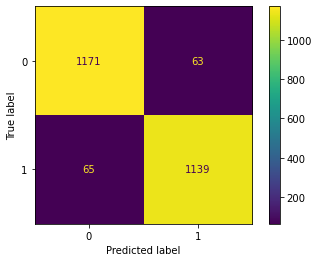

In [15]:
print("Confusion Matrix:\n", plot_confusion_matrix(logreg_ordinal, X_ordinal_test, y_ordinal_test),
      "\n\nPrecision:", precision_score(y_ordinal_test, y_ordinal_pred),
      "\nRecall:", recall_score(y_ordinal_test, y_ordinal_pred),      
      "\nF1:", f1_score(y_ordinal_test, y_ordinal_pred))

### Use one-hot encoding and `LogisticRegression` on a training set to predict the class for the test set.

In [16]:
# Define the features and class variable as 'X' and 'y' respectively.
X_one_hot = df_onehot_encoded.iloc[:, 1:]
y_one_hot = df_onehot_encoded['class']

# Split the data into train and test sets for the different models.
X_one_hot_train, X_one_hot_test, y_one_hot_train, y_one_hot_test = train_test_split(X_one_hot, y_one_hot, random_state=random_state, test_size=.3)

# Instantiate, fit and predict the model
logreg = LogisticRegression()
logreg.fit(X_one_hot_train, y_one_hot_train)
y_one_hot_pred = logreg.predict(X_one_hot_test)

# Calculate the test error and accuracy score for the model.
print("Test Error:", sum(actual != pred for actual, pred in zip(y_one_hot_test, y_one_hot_pred)) / len(y_one_hot_test))
print("Accuracy Score:", accuracy_score(y_one_hot_test, y_one_hot_pred))

Test Error: 0.00041017227235438887
Accuracy Score: 0.9995898277276456


Confusion Matrix:

Precision: 1.0 
Recall: 0.9991694352159468 
F1: 0.9995845450768591


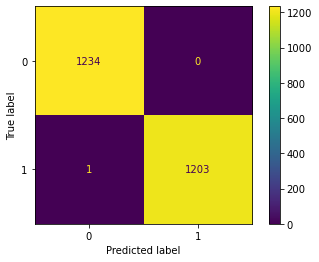

In [17]:
# Confusion matrix and other metrics
print("Confusion Matrix:\n", plot_confusion_matrix(logreg, X_one_hot_test, y_one_hot_test),
      "\n\nPrecision:", precision_score(y_one_hot_test, y_one_hot_pred),
      "\nRecall:", recall_score(y_one_hot_test, y_one_hot_pred),      
      "\nF1:", f1_score(y_one_hot_test, y_one_hot_pred))

#### One-hot encoding produced a better model than label/ordinal encoding when using logistic regression.

### Calculate feature importance using logistic regression's coefficients and standard deviation.

The feature's 'influence', or importance, can be estimated by multiplying the magnitude of the coefficient and the standard deviation of the feature in the data.

In [18]:
df_importance = pd.DataFrame({"Feature": X_one_hot.columns, "LogReg Influence": np.std(X_one_hot, 0).values*logreg.coef_[0]})
df_importance.sort_values('LogReg Influence', ascending=False, inplace=True)

# Print the head and tail (pos and neg values) to see top features.
print(df_importance.head(), '\t\t', df_importance.tail())

                       Feature  LogReg Influence
24                      odor_f          1.140584
52                stalk_root_b          1.121535
36                 gill_size_n          0.963834
57  stalk_surface_above_ring_k          0.762181
37                gill_color_b          0.722140 		                 Feature  LogReg Influence
25               odor_l         -0.574084
22               odor_a         -0.588285
97  spore_print_color_n         -0.649563
35          gill_size_b         -0.963896
27               odor_n         -1.952851


When using `LogisticRegression`, every feature is important. The coefficient is either positive or negative; none are equal to exactly zero.

In [19]:
df_importance[df_importance["LogReg Influence"] == 0]

,Feature,LogReg Influence


### Use GridSearch to determine the best prameters for a Random Forest model.

Create a `param_grid` for Random Forest parameters to be optimized, instantiate GridSearch and run on **ordinally encoded** dataframe.
```p
param_grid = {'n_estimators': [50, 100, 150],
             'max_depth': [3, 4, 5],
             'max_features': list(range(2,22))}

gs = GridSearchCV(RandomForestClassifier(), param_grid)
gs.fit(X_ordinal, y_ordinal)

print("Best Ordinal Params:", gs.best_params_)
```
Best Ordinal Params: {'max_depth': 4, 'max_features': 3, 'n_estimators': 50}


In [20]:
# # Uncomment cell to run. **Takes a couple minutes**
# param_grid = {'n_estimators': [50, 100, 150],
#              'max_depth': [3, 4, 5],
#              'max_features': list(range(2,22))}

# gs_ordinal = GridSearchCV(RandomForestClassifier(random_state=random_state), param_grid)
# gs_ordinal.fit(X_ordinal, y_ordinal)

# print("Best Ordinal Params:", gs_ordinal.best_params_)

# # Get features and importances from optimized Ordinal encoded RF. (To see which features are driving the model most)
# rf_ordinal_importances = pd.DataFrame({"Feature": X_ordinal.columns, "RF Ordinal Grid Importance": gs_ordinal.best_estimator_.feature_importances_})
# print("Length:", len(rf_ordinal_importances))
# rf_ordinal_importances.sort_values("RF Ordinal Grid Importance", ascending=False).head()

Create a `param_grid` for Random Forest parameters to be optimized, instantiate GridSearch and run on **one-hot encoded** dataframe.
```p
param_grid = {'n_estimators': [50, 100, 150],
             'max_depth': [3, 4, 5],
             'max_features': list(range(2,22))}

gs_one_hot = GridSearchCV(RandomForestClassifier(random_state=random_state), param_grid)
gs_one_hot.fit(X_one_hot, y_one_hot)

print("Best One-Hot Params:", gs_one_hot.best_params_)
```
Best One-Hot Params: {'max_depth': 5, 'max_features': 6, 'n_estimators': 50}

In [21]:
# # Uncomment cell to run. **Takes a couple minutes**
# param_grid = {'n_estimators': [50, 100, 150],
#              'max_depth': [3, 4, 5],
#              'max_features': list(range(2,22))}

# gs_one_hot = GridSearchCV(RandomForestClassifier(random_state=random_state), param_grid)
# gs_one_hot.fit(X_one_hot, y_one_hot)

# print("Best One-Hot Params", gs_one_hot.best_params_)

# # Get features and importances from optimized One-Hot encoded RF. (To see which features are driving the model most)
# rf_one_hot_importances = pd.DataFrame({"Feature": X_one_hot.columns, "RF OneHot Grid Importance" :gs_one_hot.best_estimator_.feature_importances_})
# print("Length:", len(rf_one_hot_importances[rf_one_hot_importances["RF OneHot Grid Importance"] != 0]))
# rf_one_hot_importances.sort_values("RF OneHot Grid Importance", ascending=False).head()

For this dataset, the random forest model works more efficiently with label/ordinal encoded data. While `n_estimators` is 50 for both types of encoding, `max_features` and `max_depth` are lower when using the label/ordinal encoded data. Furthermore, only 20 features are given importances with label/ordinal encoded data. This is compared to the 106 features with one hot encoding. There are many more features and many have very small importances.

### Use label/ordinal encoding and `Random Forest` on a training set to predict the class for the test set. 

In [22]:
# X and y ordinal are already defined.
# Instantiate, fit and predict using Random Forest.
# Use optimized parameters calculated above
rfclf_ordinal = RandomForestClassifier(n_estimators=50, max_depth=4, max_features=3, random_state=random_state)
rfclf_ordinal.fit(X_ordinal_train, y_ordinal_train)
y_ordinal_pred_rf = rfclf_ordinal.predict(X_ordinal_test)

# Calculate the test error and accuracy for the model
print("Test Error:", sum(actual != pred for actual, pred in zip(y_ordinal_test, y_ordinal_pred_rf)) / len(y_ordinal_test))
print("Accuracy Score:", accuracy_score(y_ordinal_test, y_ordinal_pred_rf))

Test Error: 0.011484823625922888
Accuracy Score: 0.9885151763740772


Confusion Matrix:

Precision: 0.9966216216216216 
Recall: 0.9800664451827242 
F1: 0.9882747068676716


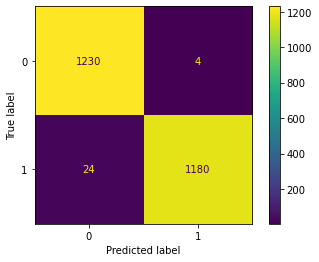

In [23]:
# Confusion Matrix and metrics
print("Confusion Matrix:\n", plot_confusion_matrix(rfclf_ordinal, X_ordinal_test, y_ordinal_test),
      "\n\nPrecision:", precision_score(y_ordinal_test, y_ordinal_pred_rf),
      "\nRecall:", recall_score(y_ordinal_test, y_ordinal_pred_rf),      
      "\nF1:", f1_score(y_ordinal_test, y_ordinal_pred_rf))

### Use one-hot encoding and  a `RandomForest` on a training set to predict the class for the test set. 

In [24]:
# X and y for one-hot are already defined.
# Instantiate, Fit and Predict the Random Forest model
# Use optimized parameters calculated above
rfclf_one_hot = RandomForestClassifier(n_estimators=50, max_depth=5, max_features=6, random_state=random_state)
rfclf_one_hot.fit(X_one_hot_train, y_one_hot_train)
y_one_hot_pred_rf = rfclf_one_hot.predict(X_one_hot_test)

# Percentage of incorrectly classified mushrooms
print("Test Error:", sum(actual != pred for actual, pred in zip(y_one_hot_test, y_one_hot_pred_rf)) / len(y_one_hot_test))
print("Accuracy Score:", accuracy_score(y_one_hot_test, y_one_hot_pred_rf))

Test Error: 0.009844134536505332
Accuracy Score: 0.9901558654634947


Confusion Matrix:

Precision: 1.0 
Recall: 0.9800664451827242 
F1: 0.9899328859060402


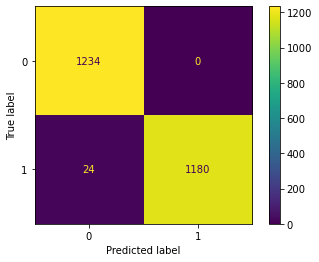

In [25]:
# Confusion Matrix and metrics
print("Confusion Matrix:\n", plot_confusion_matrix(rfclf_one_hot, X_one_hot_test, y_one_hot_test),
      "\n\nPrecision:", precision_score(y_one_hot_test, y_one_hot_pred_rf),
      "\nRecall:", recall_score(y_one_hot_test, y_one_hot_pred_rf),      
      "\nF1:", f1_score(y_one_hot_test, y_one_hot_pred_rf))

Label/Ordinal and one-hot encoding performed similarly. 

### Determine feature importance using Random Forest.

In [26]:
# Create and then add Random Forest feature importances to the DataFrame
# Using one-hot encoded data
rf_importance = pd.DataFrame({"Feature": X_one_hot_train.columns, "RF Importance": rfclf_one_hot.feature_importances_})

df_importance = df_importance.merge(rf_importance, how='left', on='Feature')
df_importance = df_importance.sort_values(['RF Importance'], ascending=False)
df_importance.head()

,Feature,LogReg Influence,RF Importance
114,gill_size_b,-0.963896,0.107167
115,odor_n,-1.952851,0.075403
0,odor_f,1.140584,0.071160
3,stalk_surface_above_ring_k,0.762181,0.065350
89,ring_type_p,-0.111881,0.056881


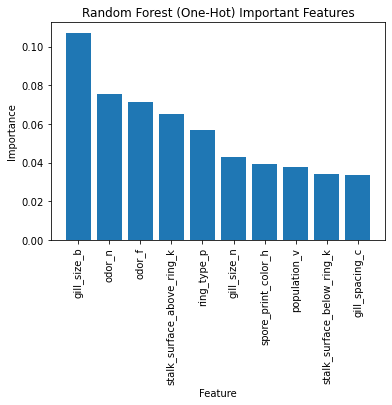

In [27]:
# Look at the top 10 features that the model deems important.

plt.bar(df_importance['Feature'].iloc[:10], df_importance['RF Importance'].iloc[:10])
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title('Random Forest (One-Hot) Important Features');

## How many features are required to get good  accuracy?

### Logistic Regression with less features

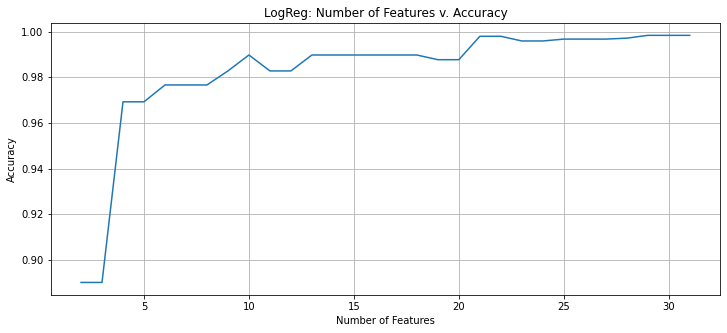

In [28]:
# Look at `df_importance`'s Logistic Regression column and sort by absolute value
# Take the top 'n' features and run Logisistic Regression. Determine accuracy.

accuracy_logreg = []
for n in range(2, 32):
    top_n_features = df_importance.iloc[df_importance["LogReg Influence"].abs().argsort()].tail(n)['Feature'].values
    df_lf_logreg = df_onehot_encoded[top_n_features]
    
    X_lf = df_lf_logreg
    y_lf = df_onehot_encoded['class']
    X_lf_train, X_lf_test, y_lf_train, y_lf_test = train_test_split(X_lf, y_lf, random_state=random_state, test_size=.3)
    
    logreg = LogisticRegression(random_state=random_state)
    logreg.fit(X_lf_train, y_lf_train)
    y_lf_pred = logreg.predict(X_lf_test)
    
    accuracy_logreg.append(accuracy_score(y_lf_test, y_lf_pred))
    
plt.figure(figsize=(12,5))
plt.grid()
plt.plot(list(range(2, 32)), accuracy_logreg)

plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('LogReg: Number of Features v. Accuracy');

#### Run `LogisticRegression` on with the best performing features with the least features.

By visual inspection, the accuracy value is large at 4 features, starts to plateau at 10 features; it gets very high at 20 features.

In [29]:
# Plug in 4, 10 and 21 to see the accuracy and features at each point.
n = 4
# n = 10
# n = 21
top_n_features = df_importance.iloc[df_importance["LogReg Influence"].abs().argsort()].tail(n)['Feature'].values
df_lf_logreg = df_onehot_encoded[top_n_features]

In [30]:
# Define X and y from one-hot encoded dataframe and split data.
X_lf = df_lf_logreg
y_lf = df_onehot_encoded['class']

X_lf_train, X_lf_test, y_lf_train, y_lf_test = train_test_split(X_lf, y_lf, random_state=random_state, test_size=.3)

In [31]:
# Instantiate, Fit and Predict LogReg with less features
logreg_lf = LogisticRegression(random_state=random_state)

logreg_lf.fit(X_lf_train, y_lf_train)
y_lf_test_pred = logreg_lf.predict(X_lf_test)

In [32]:
# Accuracy calculation: (1 - test error)
print("Test Error:", sum(actual != pred for actual, pred in zip(y_lf_test, y_lf_test_pred)) / len(y_lf_test))
print("Accuracy Score:", accuracy_score(y_lf_test, y_lf_test_pred))

Test Error: 0.030762920426579164
Accuracy Score: 0.9692370795734209


In [33]:
df_lf_importance = pd.DataFrame({"Feature": df_lf_logreg.columns, "Less Feature LogReg": np.std(X_lf, 0).values*logreg_lf.coef_[0]})
df_lf_importance.iloc[df_lf_importance['Less Feature LogReg'].abs().argsort()]

,Feature,Less Feature LogReg
1,stalk_root_b,-0.148770
3,odor_n,-1.291052
0,gill_size_b,-1.991558
2,odor_f,3.202506


### Random Forest with less features.

In [34]:
# Look at `df_importance`'s Random Forest column and sort by value
# Take the top 'n' features and run a Random Forest. Determine accuracy.

accuracy_rf = []
for n in range(2, 22):
    top_n_features = df_importance.sort_values('RF Importance', ascending=False).head(n)['Feature'].values
    df_lf_rf = df_onehot_encoded[top_n_features]

    X_lf_rf = df_lf_rf
    y_lf_rf = df_onehot_encoded['class']
    X_lf_rf_train, X_lf_rf_test, y_lf_rf_train, y_lf_rf_test = train_test_split(X_lf_rf, y_lf_rf, random_state=random_state, test_size=.3)

    lf_rfclf = RandomForestClassifier(random_state=random_state, n_estimators=50, max_depth=5)
    lf_rfclf.fit(X_lf_rf_train, y_lf_rf_train)
    y_pred_lf_rf = lf_rfclf.predict(X_lf_rf_test)
    accuracy_rf.append(accuracy_score(y_lf_rf_test, y_pred_lf_rf))


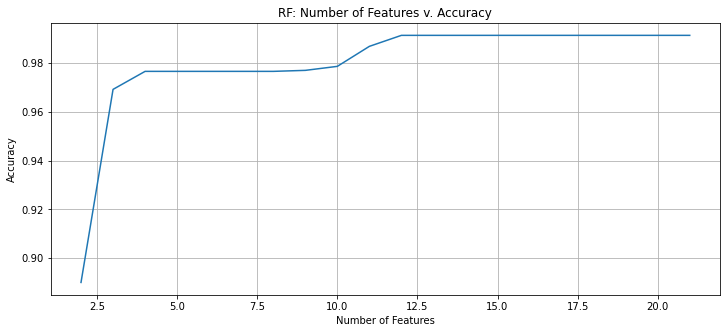

In [35]:
plt.figure(figsize=(12,5))
plt.grid()
plt.plot(list(range(2, 22)), accuracy_rf)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('RF: Number of Features v. Accuracy');

#### Run `Random Forest` on with the best performing features with the least features.

By visual inspection, is large at 3 and 4 features; the accuracy value plateaus again after 12 features.

In [36]:
# Create a dataframe with the top features
# n = 3
n = 4
# n = 12
top_n_features = df_importance.sort_values('RF Importance', ascending=False).head(n)['Feature'].values
df_lf_rf = df_onehot_encoded[top_n_features]

In [37]:
# Define X and y from one-hot encoded dataframe and split data.
X_lf_rf = df_lf_rf
y_lf_rf = df_onehot_encoded['class']

X_lf_rf_train, X_lf_rf_test, y_lf_rf_train, y_lf_rf_test = train_test_split(X_lf_rf, y_lf_rf, random_state=random_state, test_size=.3)

# Instantiate, fit and predict data with less features using Random Forest
lf_rfclf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=random_state)
lf_rfclf.fit(X_lf_rf_train, y_lf_rf_train)
y_pred_lf_rf = lf_rfclf.predict(X_lf_rf_test)

In [38]:
print("Test Error:", sum(actual != pred for actual, pred in zip(y_lf_rf_test, y_pred_lf_rf)) / len(y_lf_rf_test))
print("Accuracy Score:", accuracy_score(y_lf_rf_test, y_pred_lf_rf))

Test Error: 0.023379819524200166
Accuracy Score: 0.9766201804757998


In [39]:
df_lf_rf_importance = pd.DataFrame({"Feature": df_lf_rf.columns, "Less Feature Forest": lf_rfclf.feature_importances_})
df_lf_rf_importance.sort_values('Less Feature Forest', ascending=False, inplace=True)
df_lf_rf_importance

,Feature,Less Feature Forest
1,odor_n,0.370977
0,gill_size_b,0.269338
2,odor_f,0.211525
3,stalk_surface_above_ring_k,0.148160


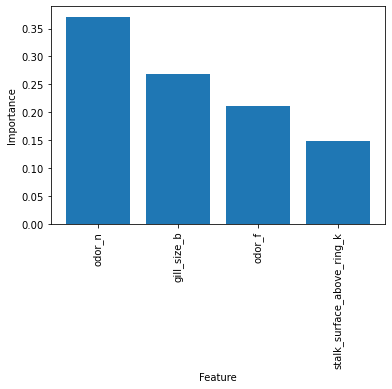

In [40]:
# Visual of the the top 10 most important features from the model.
plt.bar(df_lf_rf_importance['Feature'].iloc[:10], df_lf_rf_importance['Less Feature Forest'].iloc[:10])
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.ylabel('Importance');